In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
#import the datset, the dataset is of the number of tractors sold in each month over the years. 

#dateparse = lambda dates: pd.datetime.strptime(dates, 'Y% m%')
Tractorsales = pd.read_csv("C:/Users/archa/Documents/Sem3 files/SEM 3 projects/TractorSales.csv")

In [62]:
Tractorsales.head()

,Month-Year,Number of Tractor Sold
0,03-Jan,141
1,03-Feb,157
2,03-Mar,185
3,03-Apr,199
4,03-May,203


In [63]:
Tractorsales

,Month-Year,Number of Tractor Sold
0,03-Jan,141
1,03-Feb,157
2,03-Mar,185
3,03-Apr,199
4,03-May,203
...,...,...
139,14-Aug,848
140,14-Sep,640
141,14-Oct,581
142,14-Nov,519


In [64]:
#creating dummies for months as seasonality is an important factor in sales of tractor
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

In [65]:
# ENCODING CATEGORICAL DATA for months
Tractorsales['Month-Year'][0]

'03-Jan'

In [66]:
# creating a column named months whic contains only the first three letters of months
p = Tractorsales["Month-Year"][0]
p[3:]
Tractorsales['months']= 0



In [67]:
for i in range(144):
    p = Tractorsales["Month-Year"][i]
    Tractorsales['months'][i]= p[3:]

C:\Users\archa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\archa\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [68]:
Tractorsales

,Month-Year,Number of Tractor Sold,months
0,03-Jan,141,Jan
1,03-Feb,157,Feb
2,03-Mar,185,Mar
3,03-Apr,199,Apr
4,03-May,203,May
...,...,...,...
139,14-Aug,848,Aug
140,14-Sep,640,Sep
141,14-Oct,581,Oct
142,14-Nov,519,Nov


In [69]:
month_dummies = pd.DataFrame(pd.get_dummies(Tractorsales['months']))
df = pd.concat([Tractorsales,month_dummies],axis = 1)

In [70]:
df.head()

,Month-Year,Number of Tractor Sold,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,03-Jan,141,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,03-Feb,157,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,03-Mar,185,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,03-Apr,199,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,03-May,203,May,0,0,0,0,0,0,0,0,1,0,0,0


In [71]:
#adding time tred variable - creaating dummies
df["t"]= np.arange(1,145)

In [72]:
df["t_squared"] = df["t"]*df["t"]
df.columns
df.head()

,Month-Year,Number of Tractor Sold,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared
0,03-Jan,141,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,03-Feb,157,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,03-Mar,185,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9
3,03-Apr,199,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16
4,03-May,203,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25


In [73]:
df["t_cube"] = df["t_squared"]*df["t"]
df["t^4"] = df["t_squared"]*df["t_squared"]
#creating log of the variable
df["log_sales"] = np.log(df["Number of Tractor Sold"]) # creating log value
df.head()

,Month-Year,Number of Tractor Sold,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,t_cube,t^4,log_sales
0,03-Jan,141,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,4.948760
1,03-Feb,157,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,8,16,5.056246
2,03-Mar,185,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,27,81,5.220356
3,03-Apr,199,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,64,256,5.293305
4,03-May,203,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,125,625,5.313206


In [74]:
pd.set_option('Display.max.columns',50)

In [75]:
df.rename(columns={"Number of Tractor Sold ":"sales"}, inplace=True)


In [76]:
#since the above rename code didnt work, I used the below code to rename the column
df["sales"] = df["Number of Tractor Sold"]

In [77]:
df.head()

,Month-Year,Number of Tractor Sold,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,t_cube,t^4,log_sales,sales
0,03-Jan,141,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,4.948760,141
1,03-Feb,157,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,8,16,5.056246,157
2,03-Mar,185,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,27,81,5.220356,185
3,03-Apr,199,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,64,256,5.293305,199
4,03-May,203,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,125,625,5.313206,203


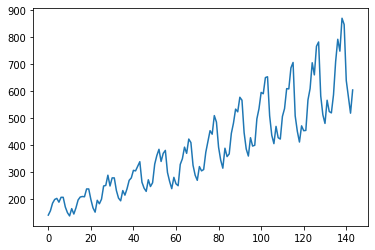

In [78]:
#plot the data
df.sales.plot()

In [79]:
#splitting the dataset
Train = df.head(n=131)
Test = df.tail(n=13)

In [80]:
Train.tail()

,Month-Year,Number of Tractor Sold,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,t_cube,t^4,log_sales,sales
126,13-Jul,767,Jul,0,0,0,0,0,1,0,0,0,0,0,0,127,16129,2048383,260144641,6.642487,767
127,13-Aug,783,Aug,0,1,0,0,0,0,0,0,0,0,0,0,128,16384,2097152,268435456,6.663133,783
128,13-Sep,583,Sep,0,0,0,0,0,0,0,0,0,0,0,1,129,16641,2146689,276922881,6.368187,583
129,13-Oct,513,Oct,0,0,0,0,0,0,0,0,0,0,1,0,130,16900,2197000,285610000,6.240276,513
130,13-Nov,481,Nov,0,0,0,0,0,0,0,0,0,1,0,0,131,17161,2248091,294499921,6.175867,481


In [81]:
Test

,Month-Year,Number of Tractor Sold,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,t_cube,t^4,log_sales,sales
131,13-Dec,567,Dec,0,0,1,0,0,0,0,0,0,0,0,0,132,17424,2299968,303595776,6.340359,567
132,14-Jan,525,Jan,0,0,0,0,1,0,0,0,0,0,0,0,133,17689,2352637,312900721,6.263398,525
133,14-Feb,520,Feb,0,0,0,1,0,0,0,0,0,0,0,0,134,17956,2406104,322417936,6.253829,520
134,14-Mar,587,Mar,0,0,0,0,0,0,0,1,0,0,0,0,135,18225,2460375,332150625,6.375025,587
135,14-Apr,710,Apr,1,0,0,0,0,0,0,0,0,0,0,0,136,18496,2515456,342102016,6.565265,710
136,14-May,793,May,0,0,0,0,0,0,0,0,1,0,0,0,137,18769,2571353,352275361,6.675823,793
137,14-Jun,749,Jun,0,0,0,0,0,0,1,0,0,0,0,0,138,19044,2628072,362673936,6.618739,749
138,14-Jul,871,Jul,0,0,0,0,0,1,0,0,0,0,0,0,139,19321,2685619,373301041,6.769642,871
139,14-Aug,848,Aug,0,1,0,0,0,0,0,0,0,0,0,0,140,19600,2744000,384160000,6.742881,848
140,14-Sep,640,Sep,0,0,0,0,0,0,0,0,0,0,0,1,141,19881,2803221,395254161,6.461468,640


In [82]:
import statsmodels.formula.api as smf

#################################### linear trend model######################################
linear_model = smf.ols("sales~t", data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test["t"])))
rmse_linear = np.sqrt(np.mean((np.array(Test["sales"])-np.array(pred_linear))**2))
rmse_linear

124.23312557051621

In [83]:
linear_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.787    
Dependent Variable: sales            AIC:                1487.5349
Date:               2021-01-09 15:16 BIC:                1493.2853
No. Observations:   131              Log-Likelihood:     -741.77  
Df Model:           1                F-statistic:        482.3    
Df Residuals:       129              Prob (F-statistic): 2.07e-45 
R-squared:          0.789            Scale:              4925.6   
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept   128.3288   12.3343  10.4042  0.0000  103.9251  152.7326
t             3.5612    0.1622  21.9618  0.0000    3.2404    3.8820
------------------------------------------------------------------
Omnibus:               4.323        Durbin-Watson:           0.550
Prob(Omnibus):         0.115        Jarque-Bera (JB):        4.221
Skew:                  0.439        Prob(JB):                0.121
Kurtosis:              2.942        Condition No.:           153  
==================================================================

"""

In [84]:
###################### exponential trend model ################################
exp_model = smf.ols("log_sales~t", data=Train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(Test["t"])))
rmse_exp = np.sqrt(np.mean((np.array(Test["sales"])-np.array(np.exp(pred_exp)))**2))
rmse_exp

127.2943031900276

In [85]:
exp_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.837   
Dependent Variable: log_sales        AIC:                -87.0716
Date:               2021-01-09 15:16 BIC:                -81.3212
No. Observations:   131              Log-Likelihood:     45.536  
Df Model:           1                F-statistic:        669.4   
Df Residuals:       129              Prob (F-statistic): 6.65e-53
R-squared:          0.838            Scale:              0.029668
-------------------------------------------------------------------
            Coef.    Std.Err.      t       P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept   5.1277     0.0303   169.3917   0.0000   5.0678   5.1876
t           0.0103     0.0004    25.8731   0.0000   0.0095   0.0111
-----------------------------------------------------------------
Omnibus:               42.126       Durbin-Watson:          0.564
Prob(Omnibus):         0.000        Jarque-Bera (JB):       7.460
Skew:                  -0.053       Prob(JB):               0.024
Kurtosis:              1.836        Condition No.:          153  
=================================================================

"""

In [86]:
############################### quadratic trend model##########################
quad_model = smf.ols("sales~t+t_squared", data=Train).fit()
pred_quad = pd.Series(quad_model.predict(pd.DataFrame(Test[["t", "t_squared"]])))
rmse_quad = np.sqrt(np.mean((np.array(Test["sales"])-np.array(pred_quad))**2))
rmse_quad

119.06125804524795

In [87]:
quad_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.792    
Dependent Variable: sales            AIC:                1485.5137
Date:               2021-01-09 15:16 BIC:                1494.1393
No. Observations:   131              Log-Likelihood:     -739.76  
Df Model:           2                F-statistic:        248.7    
Df Residuals:       128              Prob (F-statistic): 8.01e-45 
R-squared:          0.795            Scale:              4814.0   
-------------------------------------------------------------------
              Coef.    Std.Err.    t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept    156.0326   18.4673  8.4491  0.0000  119.4919  192.5734
t              2.3114    0.6459  3.5786  0.0005    1.0334    3.5894
t_squared      0.0095    0.0047  1.9975  0.0479    0.0001    0.0188
------------------------------------------------------------------
Omnibus:               2.408        Durbin-Watson:           0.568
Prob(Omnibus):         0.300        Jarque-Bera (JB):        2.412
Skew:                  0.320        Prob(JB):                0.299
Kurtosis:              2.821        Condition No.:           23615
==================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [88]:
############################ additive seasonality ########################################
add_sea = smf.ols('sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

301.6761435092593

In [89]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     2.116
Date:                Sat, 09 Jan 2021   Prob (F-statistic):             0.0240
Time:                        15:16:01   Log-Likelihood:                -831.97
No. Observations:                 131   AIC:                             1688.
Df Residuals:                     119   BIC:                             1722.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    322.6000     46.003      7.013      0.000     231.508     413.692
Jan          -38.0545     63.563     -0.599      0.551    -163.916      87.806
Feb          -28.8727     63.563     -0.454      0.650    -154.734      96.988
Mar           36.5818     63.563      0.576      0.566     -89.279     162.443
Apr           61.6727     63.563      0.970      0.334     -64.188     187.534
May          103.4909     63.563      1.628      0.106     -22.370     229.352
Jun           85.4000     63.563      1.344      0.182     -40.461     211.261
Jul          134.8545     63.563      2.122      0.036       8.994     260.716
Aug          136.5818     63.563      2.149      0.034      10.721     262.443
Sep           34.7636     63.563      0.547      0.585     -91.097     160.625
Oct           -8.8727     63.563     -0.140      0.889    -134.734     116.988
Nov          -32.0545     63.563     -0.504      0.615    -157.916      93.806
==============================================================================
Omnibus:                       16.423   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.993
Skew:                           0.234   Prob(JB):                       0.0500
Kurtosis:                       2.063   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
############################### additive seasonality with quadratic trend ###################################
add_sea_Quad = smf.ols('sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

62.23386074607824

In [91]:
add_sea_Quad.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.952    
Dependent Variable: sales            AIC:                1305.0144
Date:               2021-01-09 15:16 BIC:                1345.2672
No. Observations:   131              Log-Likelihood:     -638.51  
Df Model:           13               F-statistic:        197.3    
Df Residuals:       117              Prob (F-statistic): 5.06e-73 
R-squared:          0.956            Scale:              1122.5   
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept   116.5538   13.8298   8.4277  0.0000   89.1646  143.9431
t             2.3422    0.3124   7.4977  0.0000    1.7236    2.9609
t_squared     0.0093    0.0023   4.0491  0.0001    0.0047    0.0138
Jan         -22.7884   14.6580  -1.5547  0.1227  -51.8178    6.2410
Feb         -17.0905   14.6553  -1.1662  0.2459  -46.1145   11.9335
Mar          44.8616   14.6532   3.0616  0.0027   15.8418   73.8814
Apr          66.4315   14.6517   4.5341  0.0000   37.4146   95.4483
May         104.7100   14.6508   7.1471  0.0000   75.6950  133.7251
Jun          83.0610   14.6505   5.6695  0.0000   54.0465  112.0755
Jul         128.9388   14.6508   8.8008  0.0000   99.9237  157.9539
Aug         127.0708   14.6517   8.6728  0.0000   98.0539  156.0876
Sep          21.6388   14.6532   1.4767  0.1424   -7.3811   50.6586
Oct         -25.6300   14.6553  -1.7489  0.0829  -54.6540    3.3940
Nov         -52.4628   14.6580  -3.5791  0.0005  -81.4922  -23.4334
------------------------------------------------------------------
Omnibus:              0.551        Durbin-Watson:           0.560 
Prob(Omnibus):        0.759        Jarque-Bera (JB):        0.688 
Skew:                 0.129        Prob(JB):                0.709 
Kurtosis:             2.755        Condition No.:           101097
==================================================================
* The condition number is large (1e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [92]:
#################additive seasonality with polynomial oredr 3 trend #################################
add_sea_poly3 = smf.ols('sales~t+t_squared+t_cube+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_poly3 = pd.Series(add_sea_poly3.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared', "t_cube"]]))
rmse_add_sea_poly3 = np.sqrt(np.mean((np.array(Test['sales'])-np.array(pred_add_sea_poly3))**2))
rmse_add_sea_poly3

65.47995431527279

In [93]:
add_sea_poly3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.952    
Dependent Variable: sales            AIC:                1305.1576
Date:               2021-01-09 15:16 BIC:                1348.2856
No. Observations:   131              Log-Likelihood:     -637.58  
Df Model:           14               F-statistic:        184.4    
Df Residuals:       116              Prob (F-statistic): 3.20e-72 
R-squared:          0.957            Scale:              1116.3   
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept   127.1100   16.0466   7.9213  0.0000   95.3278  158.8923
t             1.4054    0.7918   1.7749  0.0785   -0.1629    2.9738
t_squared     0.0269    0.0139   1.9366  0.0552   -0.0006    0.0545
t_cube       -0.0001    0.0001  -1.2868  0.2007   -0.0002    0.0000
Jan         -23.5832   14.6301  -1.6120  0.1097  -52.5600    5.3936
Feb         -17.7231   14.6226  -1.2120  0.2280  -46.6851   11.2388
Mar          44.3890   14.6169   3.0368  0.0030   15.4384   73.3395
Apr          66.1173   14.6128   4.5246  0.0000   37.1748   95.0598
May         104.5532   14.6104   7.1561  0.0000   75.6155  133.4909
Jun          83.0610   14.6096   5.6854  0.0000   54.1249  111.9971
Jul         129.0956   14.6104   8.8359  0.0000  100.1579  158.0333
Aug         127.3850   14.6128   8.7173  0.0000   98.4425  156.3275
Sep          22.1114   14.6169   1.5127  0.1331   -6.8392   51.0619
Oct         -24.9974   14.6226  -1.7095  0.0900  -53.9593    3.9646
Nov         -51.6680   14.6301  -3.5316  0.0006  -80.6448  -22.6912
------------------------------------------------------------------
Omnibus:              0.875       Durbin-Watson:          0.565   
Prob(Omnibus):        0.646       Jarque-Bera (JB):       0.885   
Skew:                 0.192       Prob(JB):               0.642   
Kurtosis:             2.878       Condition No.:          11258651
==================================================================
* The condition number is large (1e+07). This might indicate
strong multicollinearity or other numerical problems.
"""

In [94]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

328.10820576301654

In [95]:
Mul_sea.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.067   
Dependent Variable: log_sales        AIC:                151.0467
Date:               2021-01-09 15:16 BIC:                185.5490
No. Observations:   131              Log-Likelihood:     -63.523 
Df Model:           11               F-statistic:        1.849   
Df Residuals:       119              Prob (F-statistic): 0.0531  
R-squared:          0.146            Scale:              0.17000 
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       5.7179    0.1304  43.8547  0.0000   5.4597  5.9761
Jan            -0.1428    0.1801  -0.7926  0.4296  -0.4995  0.2139
Feb            -0.0956    0.1801  -0.5308  0.5965  -0.4523  0.2611
Mar             0.1017    0.1801   0.5648  0.5733  -0.2550  0.4585
Apr             0.1660    0.1801   0.9214  0.3587  -0.1907  0.5227
May             0.2587    0.1801   1.4361  0.1536  -0.0980  0.6154
Jun             0.2096    0.1801   1.1634  0.2470  -0.1471  0.5663
Jul             0.3202    0.1801   1.7774  0.0781  -0.0365  0.6769
Aug             0.3235    0.1801   1.7956  0.0751  -0.0332  0.6802
Sep             0.0867    0.1801   0.4814  0.6311  -0.2700  0.4434
Oct            -0.0433    0.1801  -0.2402  0.8106  -0.4000  0.3134
Nov            -0.1207    0.1801  -0.6697  0.5043  -0.4774  0.2361
-----------------------------------------------------------------
Omnibus:               50.732       Durbin-Watson:          0.012
Prob(Omnibus):         0.000        Jarque-Bera (JB):       8.783
Skew:                  -0.208       Prob(JB):               0.012
Kurtosis:              1.802        Condition No.:          13   
=================================================================

"""

In [96]:
##################Multiplicative Seasonality with Quad Trend###########

Mul_sea_quad = smf.ols('log_sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea_quad = pd.Series(Mul_sea_quad.predict(Test))
rmse_Mult_sea_quad = np.sqrt(np.mean((np.array(Test['sales'])-np.array(np.exp(pred_Mult_sea_quad)))**2))
rmse_Mult_sea_quad 

32.54530169311331

In [97]:
Mul_sea_quad.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.987    
Dependent Variable: log_sales        AIC:                -407.4100
Date:               2021-01-09 15:16 BIC:                -367.1572
No. Observations:   131              Log-Likelihood:     217.70   
Df Model:           13               F-statistic:        762.7    
Df Residuals:       117              Prob (F-statistic): 1.86e-106
R-squared:          0.988            Scale:              0.0023612
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      4.9638    0.0201  247.4764  0.0000   4.9241   5.0035
t              0.0134    0.0005   29.4695  0.0000   0.0125   0.0142
t_squared     -0.0000    0.0000   -6.8974  0.0000  -0.0000  -0.0000
Jan           -0.0848    0.0213   -3.9892  0.0001  -0.1269  -0.0427
Feb           -0.0482    0.0213   -2.2670  0.0252  -0.0903  -0.0061
Mar            0.1387    0.0213    6.5268  0.0000   0.0966   0.1808
Apr            0.1925    0.0212    9.0596  0.0000   0.1504   0.2346
May            0.2748    0.0212   12.9343  0.0000   0.2328   0.3169
Jun            0.2154    0.0212   10.1362  0.0000   0.1733   0.2575
Jul            0.3157    0.0212   14.8568  0.0000   0.2736   0.3578
Aug            0.3087    0.0212   14.5275  0.0000   0.2666   0.3508
Sep            0.0617    0.0213    2.9049  0.0044   0.0196   0.1038
Oct           -0.0784    0.0213   -3.6897  0.0003  -0.1205  -0.0363
Nov           -0.1659    0.0213   -7.8050  0.0000  -0.2080  -0.1238
------------------------------------------------------------------
Omnibus:               0.279        Durbin-Watson:          0.600 
Prob(Omnibus):         0.870        Jarque-Bera (JB):       0.445 
Skew:                  -0.058       Prob(JB):               0.801 
Kurtosis:              2.740        Condition No.:          101097
==================================================================
* The condition number is large (1e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [98]:
##################Multiplicative Seasonality with polynomial oredr 3 Trend###########

Mul_sea_poly3 = smf.ols('log_sales~t+t_squared+t_cube+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea_poly3 = pd.Series(Mul_sea_poly3.predict(Test))
rmse_Mult_sea_poly3 = np.sqrt(np.mean((np.array(Test['sales'])-np.array(np.exp(pred_Mult_sea_poly3)))**2))
rmse_Mult_sea_poly3 

46.511034580445354

In [99]:
Mul_sea_poly3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.987    
Dependent Variable: log_sales        AIC:                -408.8406
Date:               2021-01-09 15:16 BIC:                -365.7126
No. Observations:   131              Log-Likelihood:     219.42   
Df Model:           14               F-statistic:        721.0    
Df Residuals:       116              Prob (F-statistic): 1.15e-105
R-squared:          0.989            Scale:              0.0023200
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      4.9845    0.0231  215.4707  0.0000   4.9387   5.0304
t              0.0115    0.0011   10.0832  0.0000   0.0092   0.0138
t_squared      0.0000    0.0000    0.5870  0.5583  -0.0000   0.0001
t_cube        -0.0000    0.0000   -1.7544  0.0820  -0.0000   0.0000
Jan           -0.0864    0.0211   -4.0950  0.0001  -0.1281  -0.0446
Feb           -0.0494    0.0211   -2.3447  0.0207  -0.0912  -0.0077
Mar            0.1378    0.0211    6.5383  0.0000   0.0960   0.1795
Apr            0.1919    0.0211    9.1092  0.0000   0.1502   0.2336
May            0.2745    0.0211   13.0335  0.0000   0.2328   0.3162
Jun            0.2154    0.0211   10.2258  0.0000   0.1737   0.2571
Jul            0.3160    0.0211   15.0022  0.0000   0.2743   0.3577
Aug            0.3093    0.0211   14.6832  0.0000   0.2676   0.3510
Sep            0.0627    0.0211    2.9737  0.0036   0.0209   0.1044
Oct           -0.0772    0.0211   -3.6613  0.0004  -0.1189  -0.0354
Nov           -0.1644    0.0211   -7.7929  0.0000  -0.2061  -0.1226
------------------------------------------------------------------
Omnibus:             0.327        Durbin-Watson:          0.615   
Prob(Omnibus):       0.849        Jarque-Bera (JB):       0.493   
Skew:                -0.046       Prob(JB):               0.782   
Kurtosis:            2.714        Condition No.:          11258651
==================================================================
* The condition number is large (1e+07). This might indicate
strong multicollinearity or other numerical problems.
"""

In [100]:
#### multiplicative seasonality with exponential trend
mult_seas_expo_model = smf.ols("log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov", data=Train).fit()
mult_seas_expo_pred = pd.Series(mult_seas_expo_model.predict(Test))
rmse_mult_seas_expo = np.sqrt(np.mean((np.array(Test["sales"])-np.array(np.exp(mult_seas_expo_pred)))**2))
rmse_mult_seas_expo



55.039022531566985

In [101]:
mult_seas_expo_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.982    
Dependent Variable: log_sales        AIC:                -364.7145
Date:               2021-01-09 15:16 BIC:                -327.3369
No. Observations:   131              Log-Likelihood:     195.36   
Df Model:           12               F-statistic:        589.6    
Df Residuals:       118              Prob (F-statistic): 3.39e-99 
R-squared:          0.984            Scale:              0.0032931
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      5.0364    0.0202  249.8356  0.0000   4.9965   5.0764
t              0.0103    0.0001   77.6205  0.0000   0.0101   0.0106
Jan           -0.0912    0.0251   -3.6343  0.0004  -0.1408  -0.0415
Feb           -0.0543    0.0251   -2.1663  0.0323  -0.1040  -0.0047
Mar            0.1327    0.0251    5.2926  0.0000   0.0831   0.1824
Apr            0.1866    0.0251    7.4434  0.0000   0.1370   0.2363
May            0.2690    0.0251   10.7294  0.0000   0.2194   0.3187
Jun            0.2096    0.0251    8.3591  0.0000   0.1599   0.2592
Jul            0.3099    0.0251   12.3586  0.0000   0.2602   0.3595
Aug            0.3028    0.0251   12.0770  0.0000   0.2532   0.3525
Sep            0.0557    0.0251    2.2231  0.0281   0.0061   0.1054
Oct           -0.0846    0.0251   -3.3721  0.0010  -0.1342  -0.0349
Nov           -0.1723    0.0251   -6.8684  0.0000  -0.2219  -0.1226
------------------------------------------------------------------
Omnibus:              3.454         Durbin-Watson:           0.426
Prob(Omnibus):        0.178         Jarque-Bera (JB):        2.866
Skew:                 -0.252        Prob(JB):                0.239
Kurtosis:             2.479         Condition No.:           987  
==================================================================

"""

In [102]:
################## Testing #######################################

data = {"Model":pd.Series(["rmse_linear", "rmse_exp", "rmse_quad","rmse_add_sea", "rmse_add_sea_quad", "rmse_add_sea_poly3", "rmse_Mult_sea_quad", "rmse_Mult_sea_poly3", "rmse_mult_seas_expo"]), "RMSE values":pd.Series([rmse_linear, rmse_exp, rmse_quad,rmse_add_sea, rmse_add_sea_quad, rmse_add_sea_poly3, rmse_Mult_sea_quad, rmse_Mult_sea_poly3, rmse_mult_seas_expo])}
table_rmse = pd.DataFrame(data)
table_rmse

,Model,RMSE values
0,rmse_linear,124.233126
1,rmse_exp,127.294303
2,rmse_quad,119.061258
3,rmse_add_sea,301.676144
4,rmse_add_sea_quad,62.233861
5,rmse_add_sea_poly3,65.479954
6,rmse_Mult_sea_quad,32.545302
7,rmse_Mult_sea_poly3,46.511035
8,rmse_mult_seas_expo,55.039023


In [103]:
# so rmse_Mult_sea_quad - quadtraic trend with mmultiplicative seasonality has the least value among the models prepared so far 
# Predicting new values using the best model(quadtraic trend with mmultiplicative seasonality)

predict_data = pd.read_csv("C:/Users/archa/Documents/Sem3 files/SEM 3 projects/Predict_tractor_sales.csv")
model_full = smf.ols('log_sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = df).fit()

In [104]:
pred_new  = pd.Series(Mul_sea_quad.predict(predict_data))
pred_new

0     6.233564
1     6.153431
2     6.326676
3     6.249145
4     6.292996
5     6.487070
6     6.548015
7     6.637425
8     6.585011
9     6.692320
10    6.692295
11    6.452235
12    6.318938
13    6.238255
14    6.410950
dtype: float64

In [105]:
#since the multiplicative model uses log of th ey variable, i have taken log of th eforecastedd values
predict_data["log_forecasted_Sales"] = pd.Series(pred_new)
predict_data

,Month-Year,Number of Tractor Sold,t,t_squared,t_cube,log_sales,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,log_forecasted_Sales
0,13-Oct,513,130,16900,2197000,6.240276,0,0,0,0,0,0,0,0,0,0,1,0,6.233564
1,13-Nov,481,131,17161,2248091,6.175867,0,0,0,0,0,0,0,0,0,1,0,0,6.153431
2,13-Dec,567,132,17424,2299968,6.340359,0,0,1,0,0,0,0,0,0,0,0,0,6.326676
3,14-Jan,525,133,17689,2352637,6.263398,0,0,0,0,1,0,0,0,0,0,0,0,6.249145
4,14-Feb,520,134,17956,2406104,6.253829,0,0,0,1,0,0,0,0,0,0,0,0,6.292996
5,14-Mar,587,135,18225,2460375,6.375025,0,0,0,0,0,0,0,1,0,0,0,0,6.487070
6,14-Apr,710,136,18496,2515456,6.565265,1,0,0,0,0,0,0,0,0,0,0,0,6.548015
7,14-May,793,137,18769,2571353,6.675823,0,0,0,0,0,0,0,0,1,0,0,0,6.637425
8,14-Jun,749,138,19044,2628072,6.618739,0,0,0,0,0,0,1,0,0,0,0,0,6.585011
9,14-Jul,871,139,19321,2685619,6.769642,0,0,0,0,0,1,0,0,0,0,0,0,6.692320


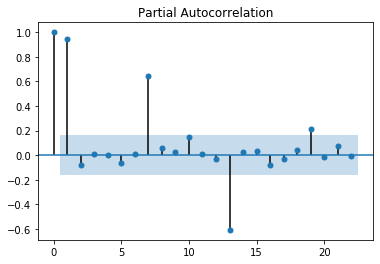

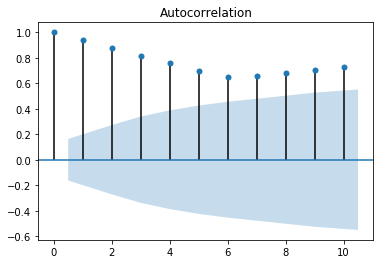

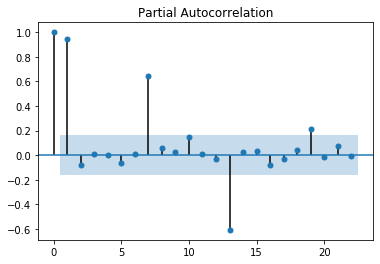

In [106]:
import statsmodels.graphics.tsaplots as tsa_plots
# ACF plots and PACF plots on Original data sets 
tsa_plots.plot_acf(df.log_sales,lags=10)
tsa_plots.plot_pacf(df.log_sales)

In [107]:
import statsmodels.api as sm

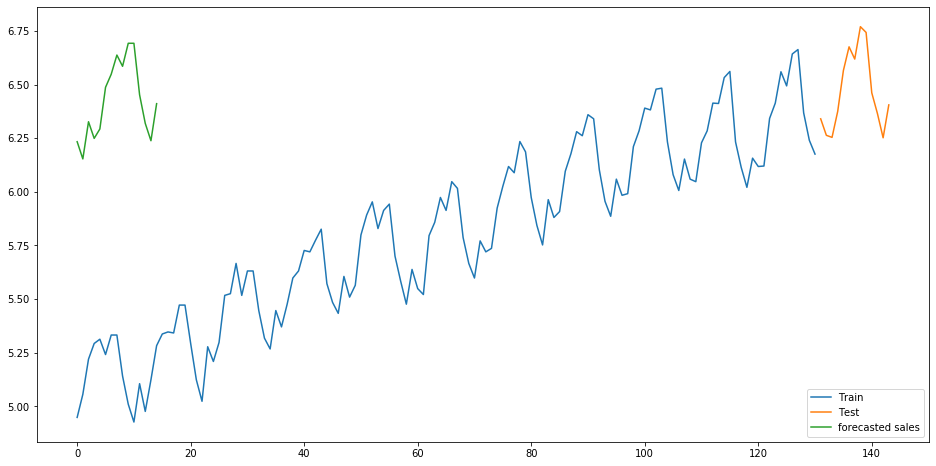

In [108]:
#the plot
plt.figure(figsize=(16,8))
plt.plot( Train['log_sales'], label='Train')
plt.plot(Test['log_sales'], label='Test')
plt.plot(predict_data['log_forecasted_Sales'], label='forecasted sales')
plt.legend(loc='best')

In [109]:
from   statsmodels.tsa.stattools  import  adfuller
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.statespace as tm_models
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\archa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


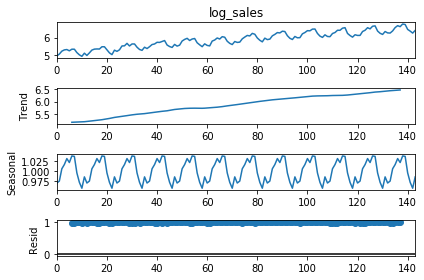

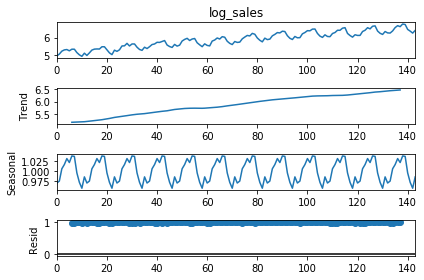

In [110]:
#deseasonalising the data to see the different time trend components
decompose_ts_add = seasonal_decompose(df.log_sales,model="multiplicative",freq=12)
decompose_ts_add.plot()


C:\Users\archa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


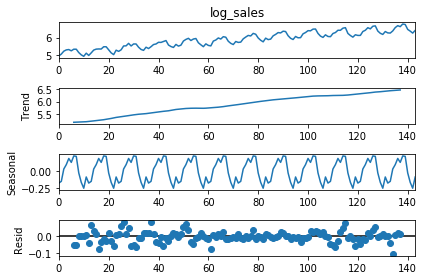

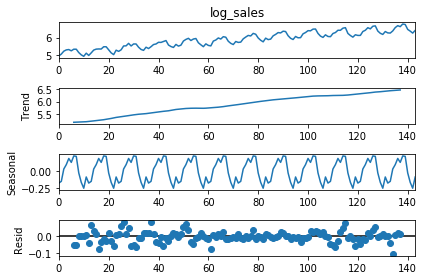

In [111]:
decompose_ts_add = seasonal_decompose(df.log_sales,model="additive",freq=12)
decompose_ts_add.plot()

In [112]:
# 1,0,0 ARIMA Model
model = ARIMA(df.sales, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# ARIMA model of higher degrees dont give results as good as (1,0,1), hence choosing ARIMA(1,0,1)

                              ARMA Model Results                              
Dep. Variable:                  sales   No. Observations:                  144
Model:                     ARMA(1, 0)   Log Likelihood                -785.540
Method:                       css-mle   S.D. of innovations             56.157
Date:                Sat, 09 Jan 2021   AIC                           1577.079
Time:                        15:16:10   BIC                           1585.989
Sample:                             0   HQIC                          1580.699
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         386.2162     82.489      4.682      0.000     224.541     547.892
ar.L1.sales     0.9495      0.026     36.701      0.000       0.899       1.000
                                    Roots       

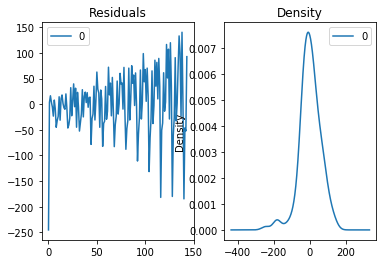

In [113]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

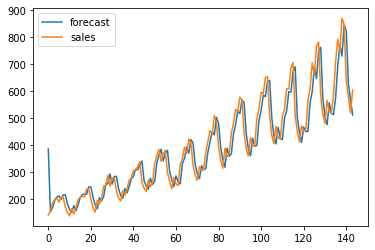

In [114]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [115]:
# Building the Model
# model = ARIMA(train, order=(1,0,1))  
model2 = ARIMA(Train.sales, order=(1, 0, 0))  
fitted = model2.fit(disp=-1) 

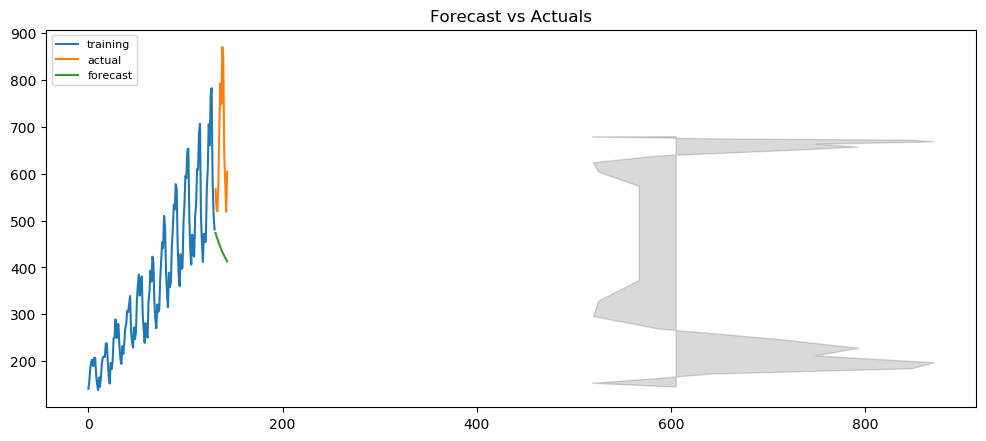

In [116]:
# Forecast
fc, se, conf = fitted.forecast(13, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=Test.index)
lower_series = pd.Series(conf[:, 0], index=Test.sales)
upper_series = pd.Series(conf[:, 1], index=Test.sales)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(Train.sales, label='training')
plt.plot(Test.sales, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [117]:
# the ARIMA (1,0,1) model is the best fit for the given datset